In [2]:
import dlib
import os
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [3]:
import zipfile
path = '/content/drive/MyDrive/Datasets/jones_gabriel.zip'
zip_object = zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
import os
print(os.listdir('/content/jones_gabriel'))

['person.1.15.jpg', 'person.1.12.jpg', 'person.1.8.jpg', 'person.2.12.jpg', 'person.2.16.jpg', 'person.2.9.jpg', 'person.1.14.jpg', 'person.2.21.jpg', 'person.1.3.jpg', 'person.2.24.jpg', 'person.1.9.jpg', 'person.1.13.jpg', 'person.1.1.jpg', 'person.1.25.jpg', 'person.1.7.jpg', 'person.2.25.jpg', 'person.2.17.jpg', 'person.1.6.jpg', 'person.1.23.jpg', 'person.2.2.jpg', 'person.1.24.jpg', 'person.2.11.jpg', 'person.2.13.jpg', 'person.2.15.jpg', 'person.2.10.jpg', 'person.2.23.jpg', 'person.1.19.jpg', 'person.2.6.jpg', 'person.1.18.jpg', 'person.1.5.jpg', 'person.1.11.jpg', 'person.2.8.jpg', 'person.2.4.jpg', 'person.2.22.jpg', 'person.2.7.jpg', 'person.1.10.jpg', 'person.2.1.jpg', 'person.1.21.jpg', 'person.2.19.jpg', 'person.1.20.jpg', 'person.2.5.jpg', 'person.1.17.jpg', 'person.2.18.jpg', 'person.2.14.jpg', 'person.1.16.jpg', 'person.1.4.jpg', 'person.2.20.jpg', 'person.1.22.jpg', 'person.1.2.jpg', 'person.2.3.jpg']


In [7]:
def get_image_data():
  paths = [os.path.join('/content/jones_gabriel',f) for f in os.listdir('/content/jones_gabriel')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image,'uint8')
    id = int(path.split('.')[1])
    ids.append(id)
    faces.append(image_np)

  return np.array(ids),faces 




In [8]:
ids, faces = get_image_data()

In [9]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

In [10]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [11]:
image = Image.open('/content/jones_gabriel/person.1.1.jpg')
image.size

(220, 220)

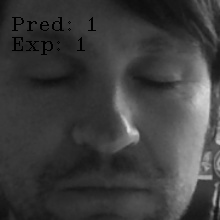

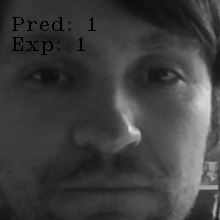

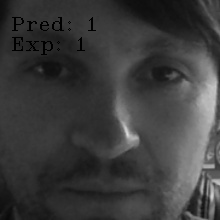

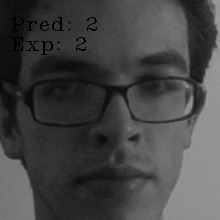

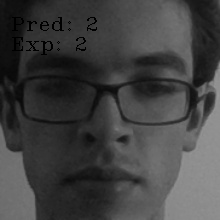

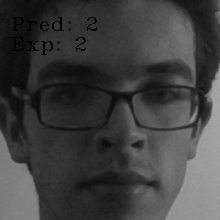

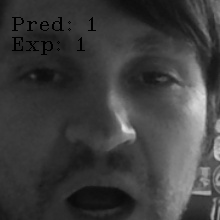

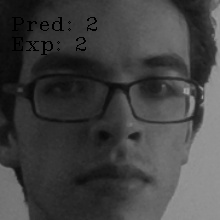

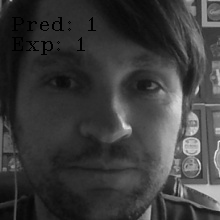

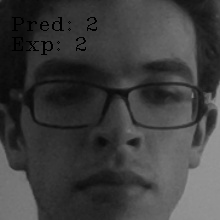

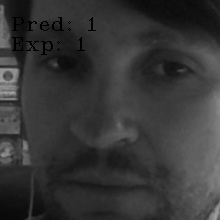

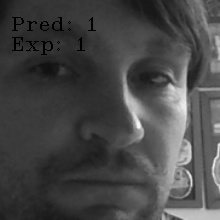

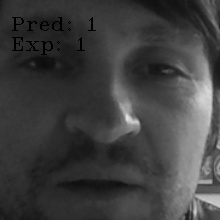

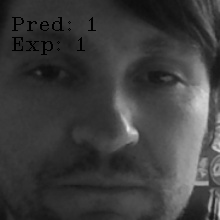

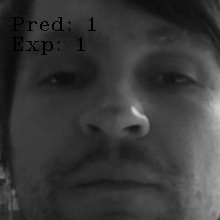

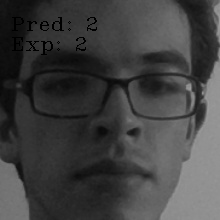

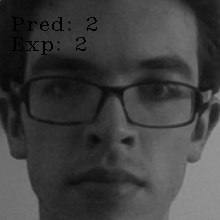

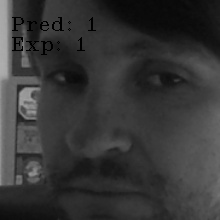

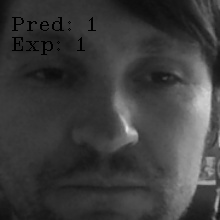

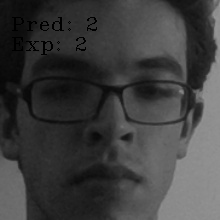

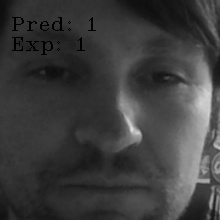

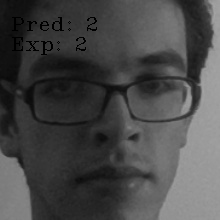

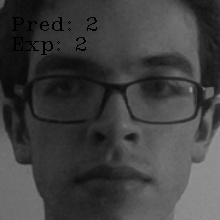

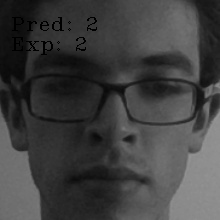

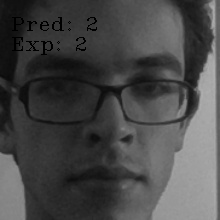

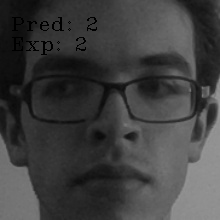

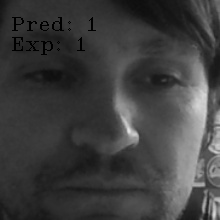

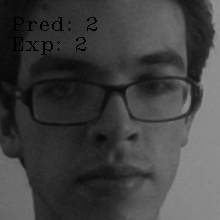

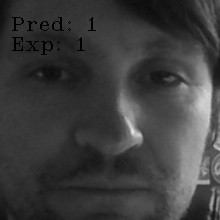

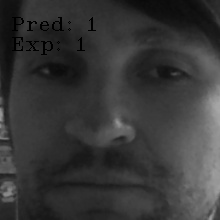

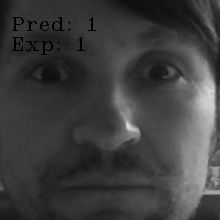

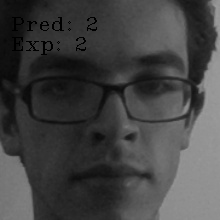

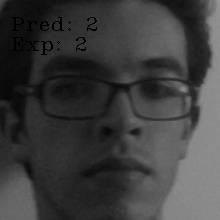

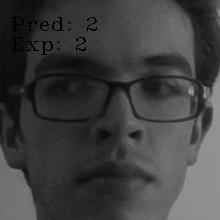

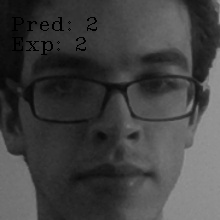

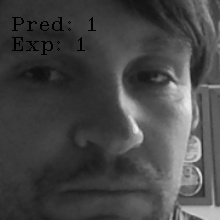

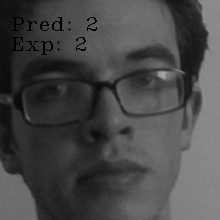

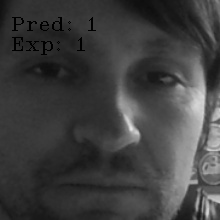

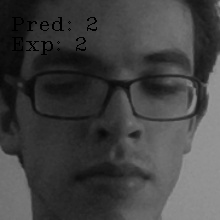

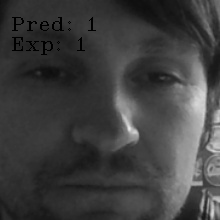

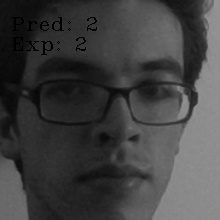

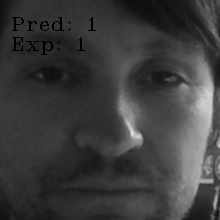

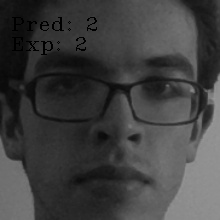

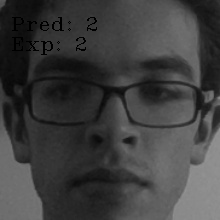

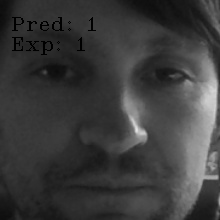

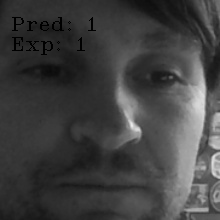

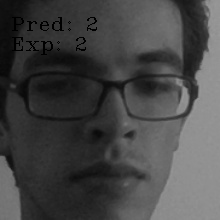

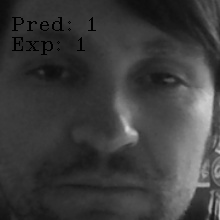

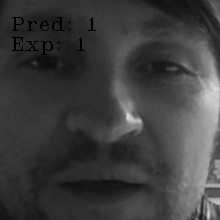

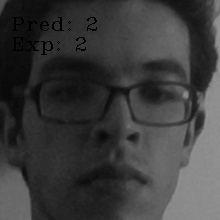

In [13]:
paths = [os.path.join('/content/jones_gabriel',f) for f in os.listdir('/content/jones_gabriel/')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image,'uint8')
  predictions,_ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np,'Pred: ' + str(predictions), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
  cv2.putText(image_np,'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
  cv2_imshow(image_np)